In [1]:
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt

import pandas_profiling

In [2]:
train = pd.read_csv("data/aug_train.csv")

In [3]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
profile = pandas_profiling.ProfileReport(train)

In [8]:
#profile

In [9]:
train = train.loc[:, train.columns[~ train.columns.str.contains("_id")]]

In [10]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## NaN

In [11]:
train.isnull().mean()

city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [12]:
train.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

## city

<IPython.core.display.Javascript object>


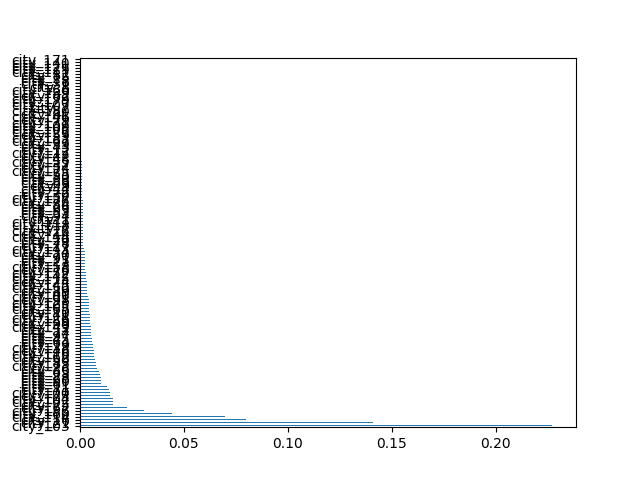

In [13]:
plt.figure()

train["city"].value_counts(normalize=True).plot(kind="barh")

plt.show()

In [14]:
train["city"].value_counts(normalize=True).sort_values(ascending=False)[:10]

city_103    0.227320
city_21     0.141038
city_16     0.080019
city_114    0.069736
city_160    0.044107
city_136    0.030588
city_67     0.022497
city_75     0.015920
city_102    0.015868
city_104    0.015711
Name: city, dtype: float64

In [15]:
most_freq_cities = train["city"].value_counts(normalize=True).sort_values(ascending=False)[:7].index.tolist()
most_freq_cities

['city_103',
 'city_21',
 'city_16',
 'city_114',
 'city_160',
 'city_136',
 'city_67']

In [96]:
train.loc[~ train["city"].isin(most_freq_cities), :]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,city_40,0.776,Male,Has relevent experience,no_enrollment,NaN,NaN,5,10/49,Early Stage Startup,1,26,0.0
19145,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0
19151,city_149,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60,0.0
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0


In [16]:
train.loc[~train["city"].isin(most_freq_cities), :]


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,city_40,0.776,Male,Has relevent experience,no_enrollment,NaN,NaN,5,10/49,Early Stage Startup,1,26,0.0
19145,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0
19151,city_149,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60,0.0
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0


In [17]:
train.loc[~train["city"].isin(most_freq_cities), "city"] = "other_city"

In [18]:
train.loc[~train["city"].isin(most_freq_cities), :]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,other_city,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
3,other_city,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,other_city,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,other_city,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
7,other_city,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,other_city,0.776,Male,Has relevent experience,no_enrollment,NaN,NaN,5,10/49,Early Stage Startup,1,26,0.0
19145,other_city,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0
19151,other_city,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60,0.0
19153,other_city,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0


<IPython.core.display.Javascript object>


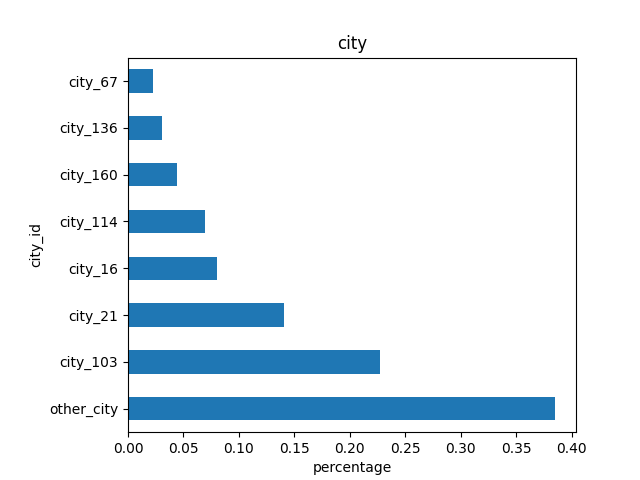

In [26]:
plt.figure()

train["city"].value_counts(normalize=True).plot(kind="barh")

plt.title("city")

plt.ylabel("city_id")
plt.xlabel("percentage")
plt.subplots_adjust(bottom=0.1, left=0.2)

plt.show()

## city_development_index

<IPython.core.display.Javascript object>


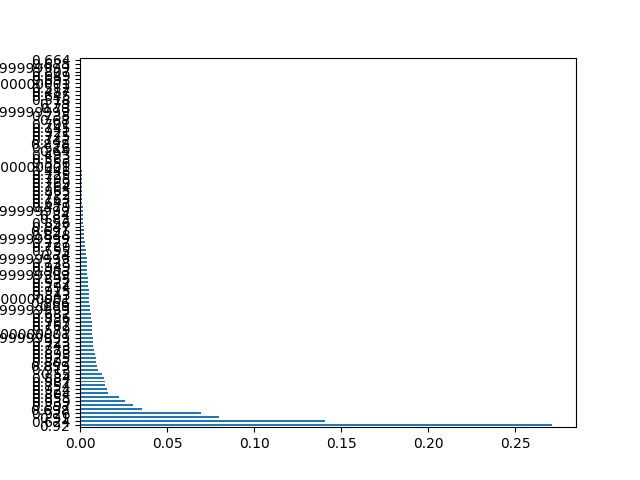

In [27]:
plt.figure()

train["city_development_index"].value_counts(normalize=True).plot(kind="barh")

plt.show()

In [31]:
train.loc[~train["city"].isin(most_freq_cities), "city_development_index"].mean()

0.7981966078697423

In [37]:
train.loc[~train["city"].isin(most_freq_cities), "city_development_index"] = train.loc[~train["city"].isin(most_freq_cities), "city_development_index"].mean().round(3)

<IPython.core.display.Javascript object>


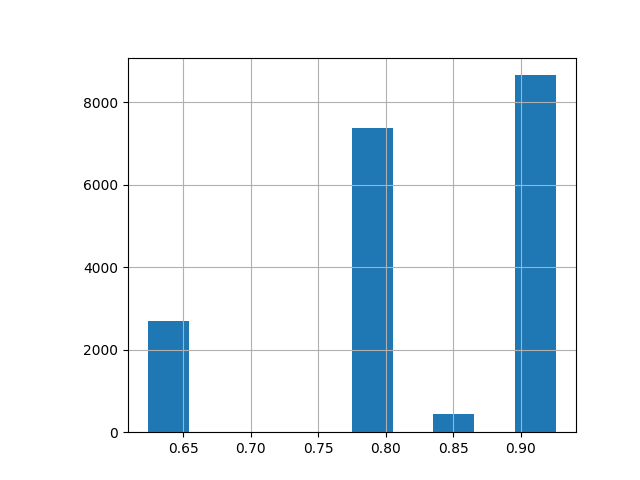

In [38]:
plt.figure()

train["city_development_index"].hist()
plt.subplots_adjust(bottom=0.1, left=0.2)

plt.show()

<IPython.core.display.Javascript object>


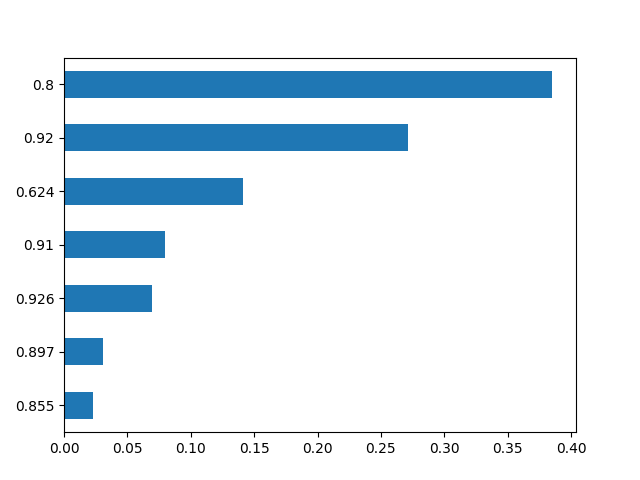

In [40]:
plt.figure()

train["city_development_index"].value_counts(normalize=True).sort_values().plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.1)

plt.show()

## gender

<IPython.core.display.Javascript object>


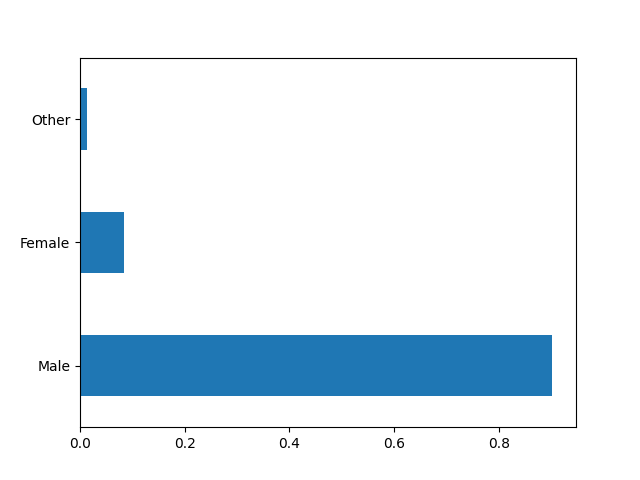

In [41]:
plt.figure()

train["gender"].value_counts(normalize=True).plot(kind="barh")

plt.show()

## relevent_experience

<IPython.core.display.Javascript object>


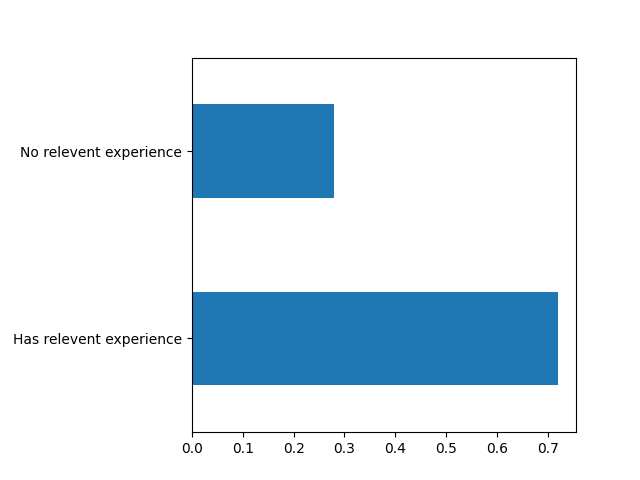

In [43]:
plt.figure()

train["relevent_experience"].value_counts(normalize=True).plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.3)


plt.show()

## enrolled_university

<IPython.core.display.Javascript object>


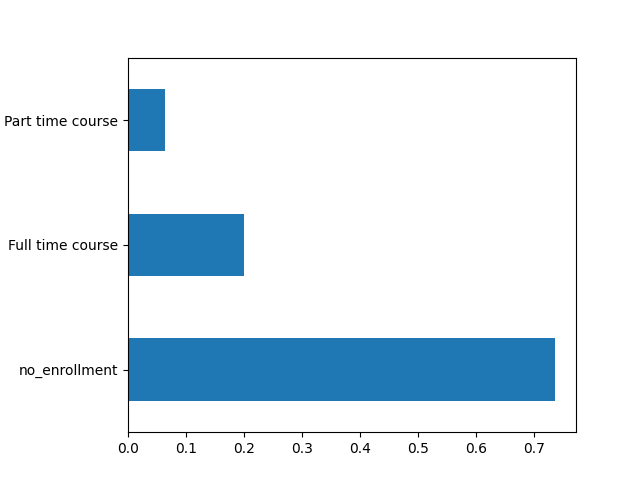

In [46]:
plt.figure()

train["enrolled_university"].value_counts(normalize=True).plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.2)


plt.show()

## education_level

<IPython.core.display.Javascript object>


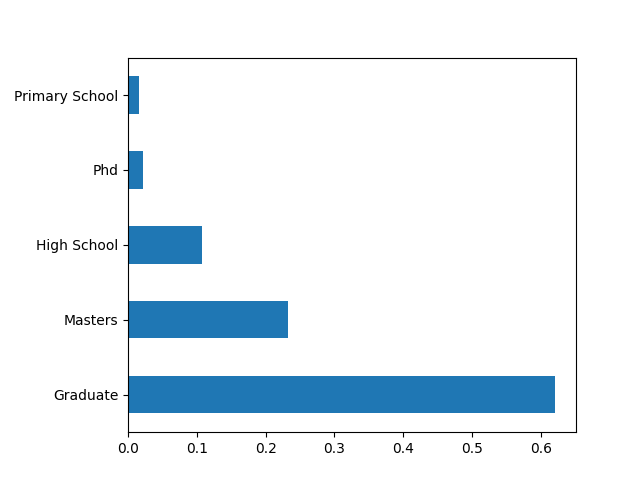

In [48]:
plt.figure()

train["education_level"].value_counts(normalize=True).plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.2)


plt.show()

## major_discipline

<IPython.core.display.Javascript object>


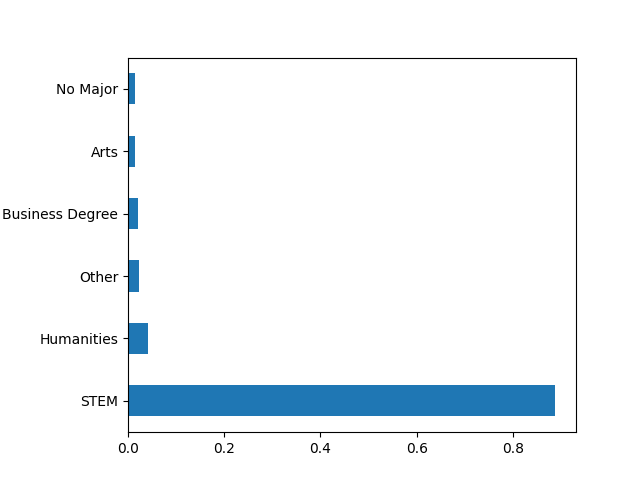

In [50]:
plt.figure()

train["major_discipline"].value_counts(normalize=True).plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.2)


plt.show()

## experience

<IPython.core.display.Javascript object>


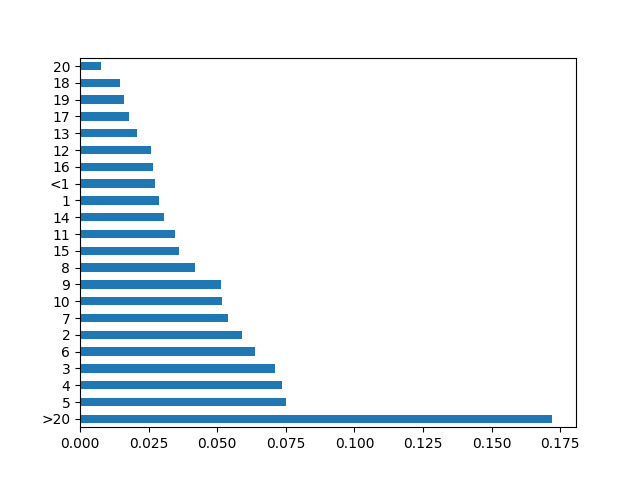

In [51]:
plt.figure()

train["experience"].value_counts(normalize=True).plot(kind="barh")

plt.show()

## company_size

<IPython.core.display.Javascript object>


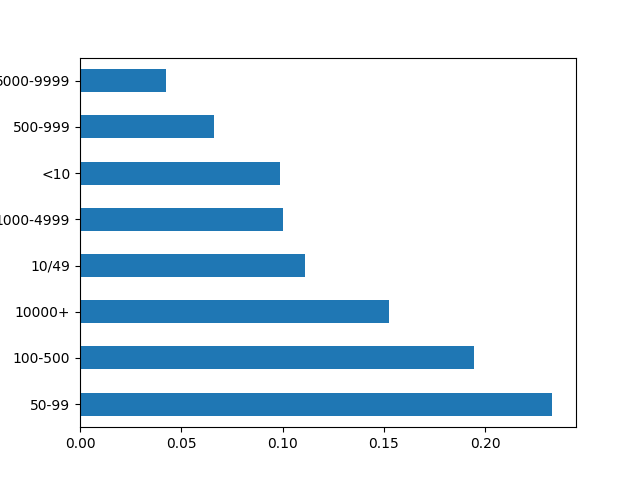

In [54]:
plt.figure()

train["company_size"].value_counts(normalize=True).plot(kind="barh")

plt.show()

## company_type

<IPython.core.display.Javascript object>


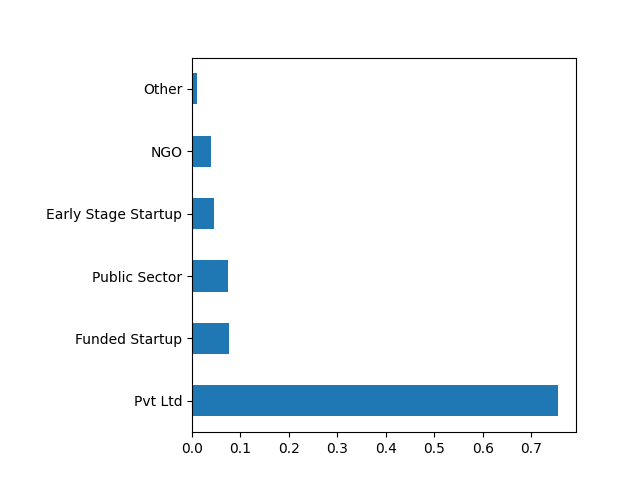

In [57]:
plt.figure()

train["company_type"].value_counts(normalize=True).plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.3)


plt.show()

## last_new_job

<IPython.core.display.Javascript object>


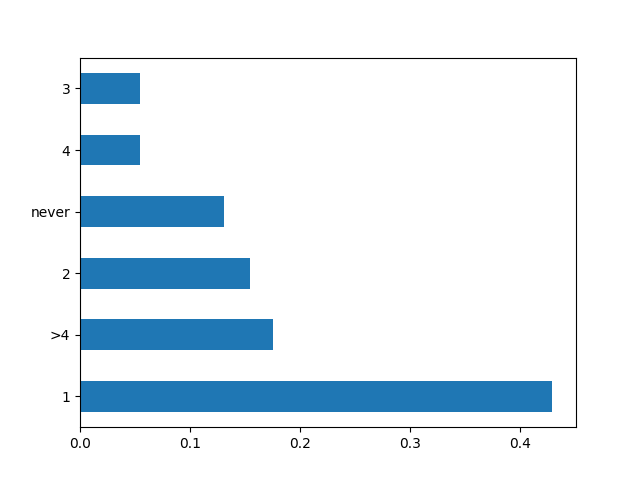

In [58]:
plt.figure()

train["last_new_job"].value_counts(normalize=True).plot(kind="barh")

plt.show()

## training_hours

<IPython.core.display.Javascript object>


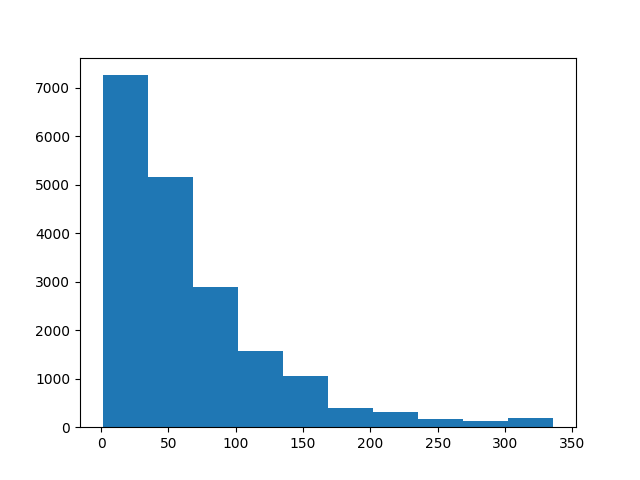

In [59]:
plt.figure()


train["training_hours"].hist().grid(False)



plt.show()

## target

<IPython.core.display.Javascript object>


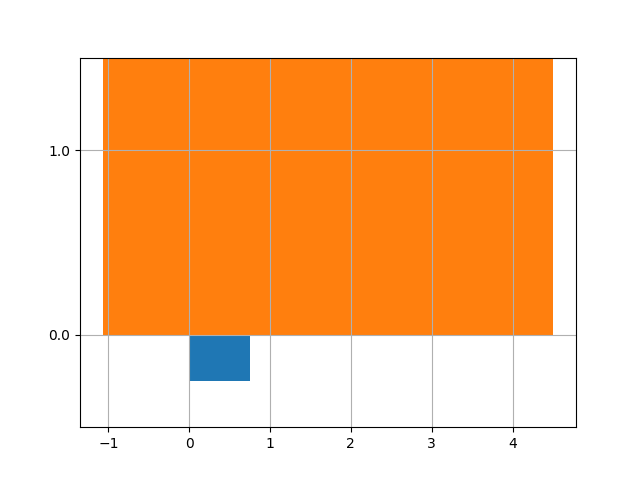

In [60]:
plt.figure()

train["target"].value_counts(normalize=True).plot(kind="barh")

plt.show()

# DUMMY 1ST MODEL

In [80]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

In [92]:
dummy_train = pd.get_dummies(train, drop_first=True)

In [107]:
dummy_train.head()

,city_development_index,training_hours,target,city_city_114,city_city_136,city_city_16,city_city_160,city_city_21,city_city_67,city_other_city,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,36,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.800,47,0.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0.624,83,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.800,52,1.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.800,8,0.0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [93]:
X = dummy_train.iloc[:, :-1]
y = dummy_train.iloc[:, -1]

In [94]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [99]:
folds = 10

In [100]:
skf = StratifiedKFold(n_splits=folds)
skf.get_n_splits(X, y)

10

In [106]:
roc_auc_avg = 0
k = 0
for train_index, test_index in skf.split(X, y):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    lg = linear_model.LogisticRegression(max_iter=3000)
    lg.fit(X_train, y_train)
    
    roc_auc_avg += roc_auc_score(lg.predict(X_test), y_test)
    
    print("fold " + str(k) + " " + str(roc_auc_score(lg.predict(X_test), y_test)))
    
print("avg roc_auc score is " + str(roc_auc_avg/k))
    

fold 1 0.8293514941067148
fold 2 0.7931463372791216
fold 3 0.7671955793783205
fold 4 0.8200111666913549
fold 5 0.8318448574362625
fold 6 0.7927774626583475
fold 7 0.7963737531211579
fold 8 0.8018558300513187
fold 9 0.8041305312103275
fold 10 0.8325676638176639
avg roc_auc score is 0.8069254675750589


## for now, let's use models that can handle missing values

## scaling data

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [110]:
sca = StandardScaler()

In [111]:
train_std = train.copy()

In [112]:
train_std.loc[:, ["city_development_index", "training_hours"]] = sca.fit_transform(train_std.loc[:, ["city_development_index", "training_hours"]])


In [113]:
std_X = pd.get_dummies(train_std.iloc[:, :-1], drop_first=True)
std_y = train_std.iloc[:, -1]

In [114]:
std_skf = StratifiedKFold(n_splits=folds)
std_skf.get_n_splits(std_X, std_y)

10

In [115]:
roc_auc_avg = 0
k = 0
for train_index, test_index in skf.split(X, y):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    lg = linear_model.LogisticRegression(max_iter=3000)
    lg.fit(X_train, y_train)
    
    roc_auc_avg += roc_auc_score(lg.predict(X_test), y_test)
    
    print("fold " + str(k) + " " + str(roc_auc_score(lg.predict(X_test), y_test)))
    
print("avg roc_auc score is " + str(roc_auc_avg/k))

fold 1 0.8293514941067148
fold 2 0.7931463372791216
fold 3 0.7671955793783205
fold 4 0.8200111666913549
fold 5 0.8318448574362625
fold 6 0.7927774626583475
fold 7 0.7963737531211579
fold 8 0.8018558300513187
fold 9 0.8041305312103275
fold 10 0.8325676638176639
avg roc_auc score is 0.8069254675750589


In [117]:
train_std.loc[:, "training_hours"].hist()

<AxesSubplot:>